In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Data/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
columns = df.columns[:-1].to_list()
columns.remove("bmi")

for i in columns:
    unique_values=df[i].unique()
    print(f"Unique values for {i} column are ==> {unique_values}")

Unique values for age column are ==> [19 18 28 33 32 31 46 37 60 25 62 23 56 27 52 30 34 59 63 55 22 26 35 24
 41 38 36 21 48 40 58 53 43 64 20 61 44 57 29 45 54 49 47 51 42 50 39]
Unique values for sex column are ==> ['female' 'male']
Unique values for children column are ==> [0 1 3 2 5 4]
Unique values for smoker column are ==> ['yes' 'no']
Unique values for region column are ==> ['southwest' 'southeast' 'northwest' 'northeast']


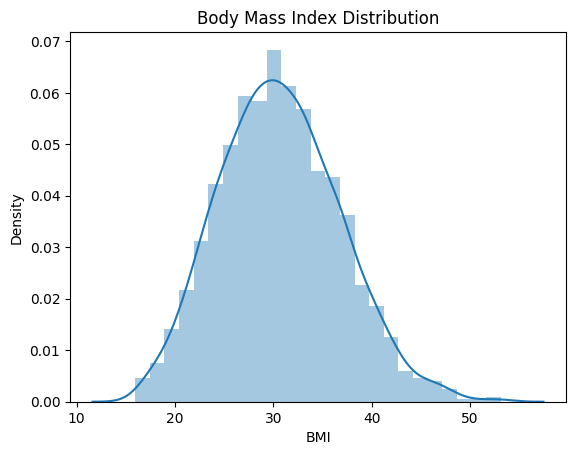

In [5]:
sns.distplot(df["bmi"], kde=True)
plt.title('Body Mass Index Distribution')
plt.xlabel("BMI")
plt.show();

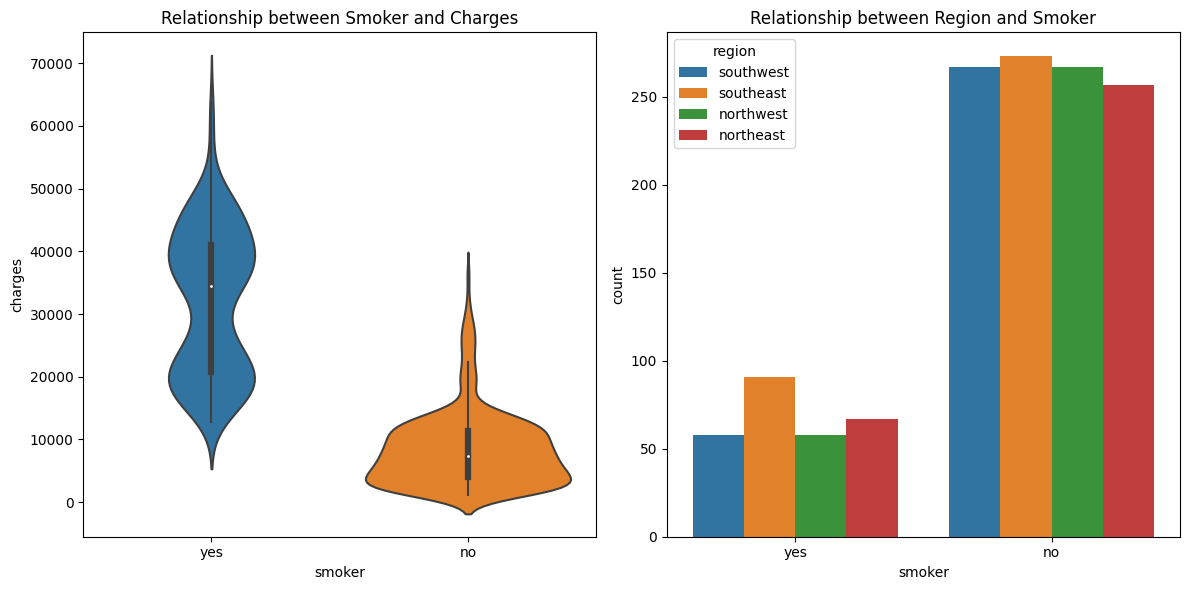

In [6]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.violinplot(x='smoker', y='charges', data=df)
plt.title('Relationship between Smoker and Charges')

plt.subplot(1, 2, 2)
sns.countplot(x='smoker', hue='region', data=df)
plt.title('Relationship between Region and Smoker')

plt.tight_layout()

plt.show()

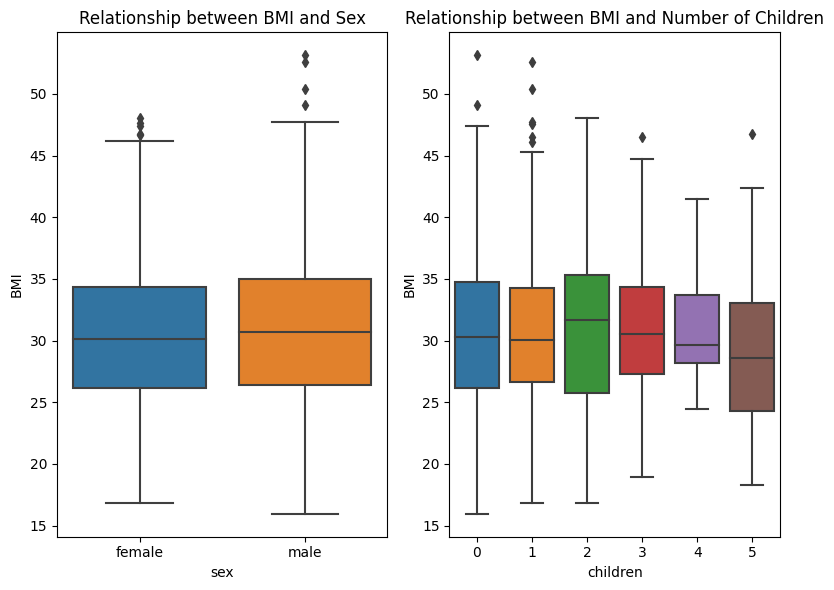

In [7]:
plt.figure(figsize=(8, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='sex', y='bmi', data=df)
plt.title('Relationship between BMI and Sex')
plt.ylabel('BMI')

plt.subplot(1, 2, 2)
sns.boxplot(x='children', y='bmi', data=df)
plt.title('Relationship between BMI and Number of Children')
plt.ylabel('BMI')

plt.tight_layout()

plt.show()

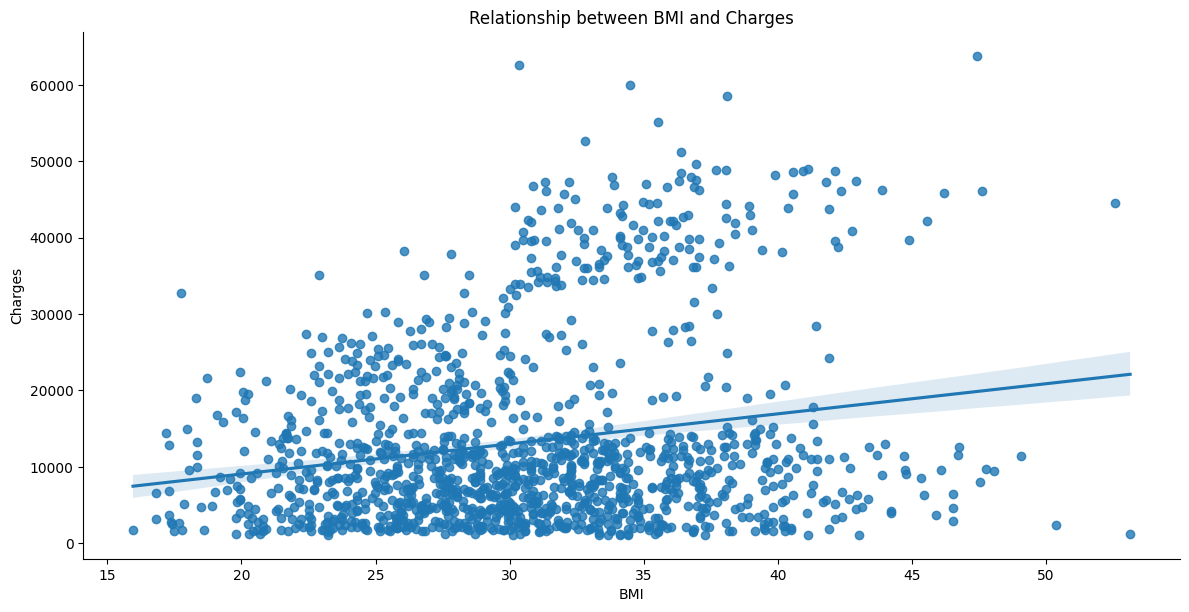

In [8]:
sns.lmplot(x='bmi',y='charges',data=df,aspect=2,height=6)
plt.title('Relationship between BMI and Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')

plt.show()

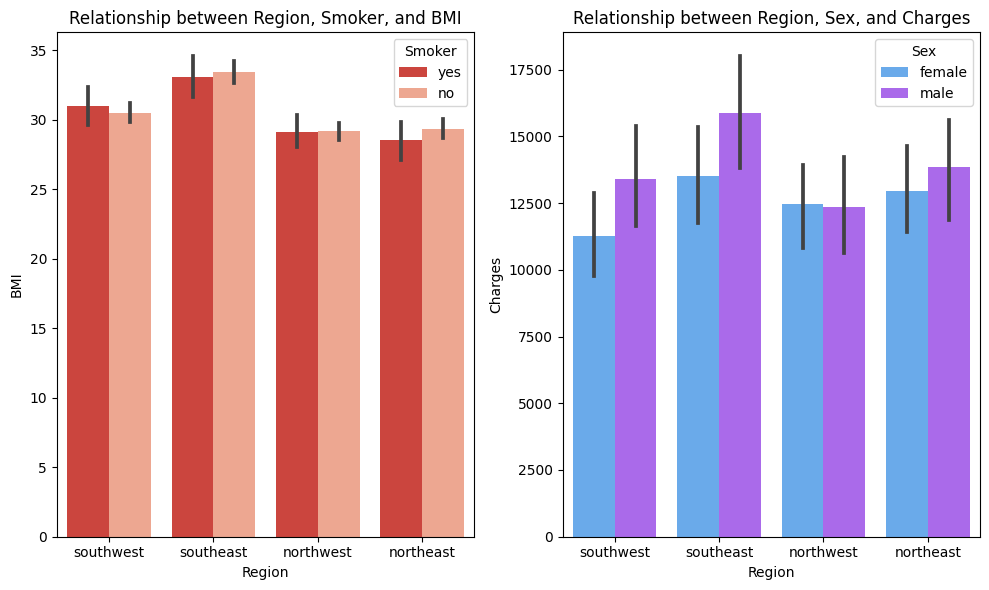

In [9]:
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
sns.barplot(x="region", y="bmi", hue="smoker", data=df, palette='Reds_r')
plt.title('Relationship between Region, Smoker, and BMI')
plt.xlabel('Region')
plt.ylabel('BMI')
plt.legend(title='Smoker', loc="upper right")

plt.subplot(1, 2, 2)
sns.barplot(x="region", y="charges", hue="sex", data=df, palette='cool')
plt.title('Relationship between Region, Sex, and Charges')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.legend(title='Sex', loc="upper right")

plt.tight_layout()
plt.show()

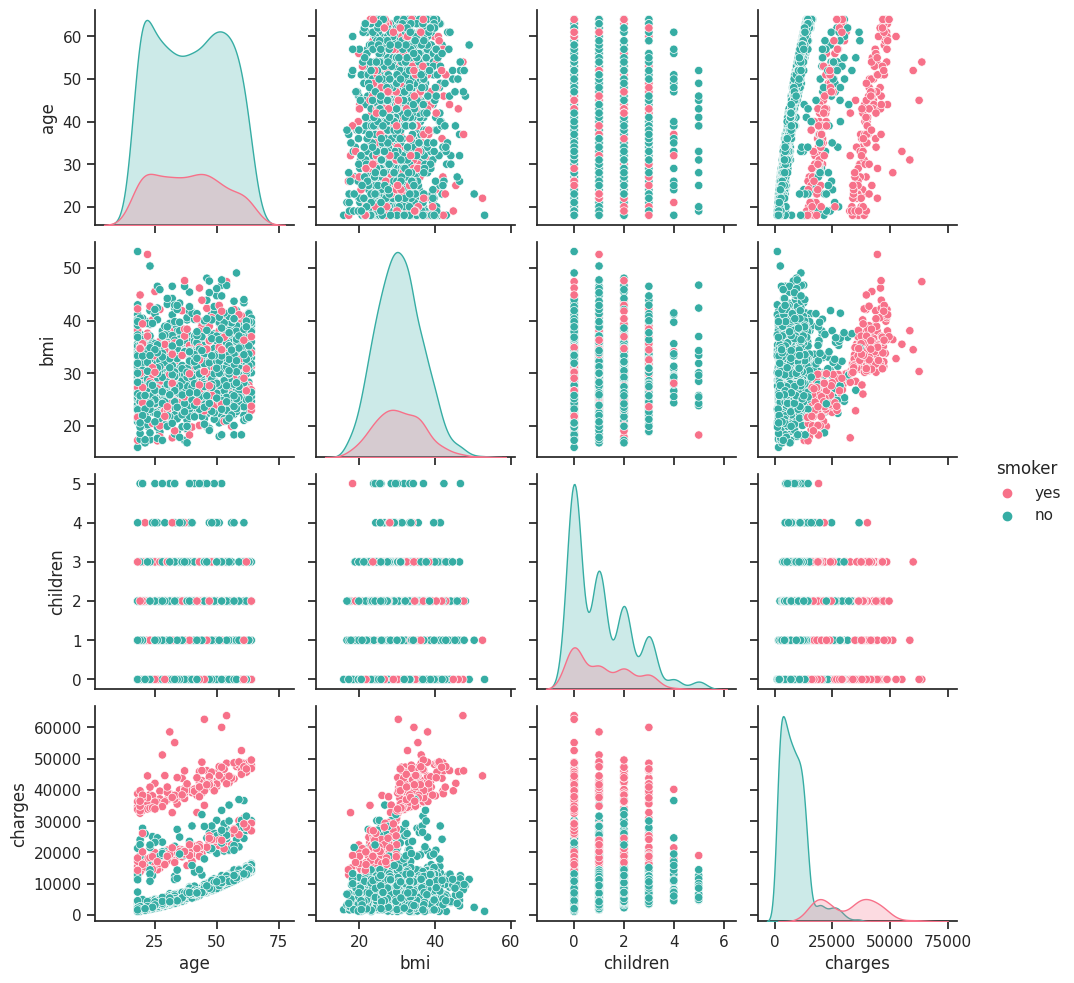

In [10]:
# Set style
sns.set(style="ticks")

# Create a scatterplot matrix with hue based on "smoker"
sns.pairplot(df, vars=["age", "bmi", "children", "charges"], hue="smoker", palette="husl")

# Show the plot
plt.show()

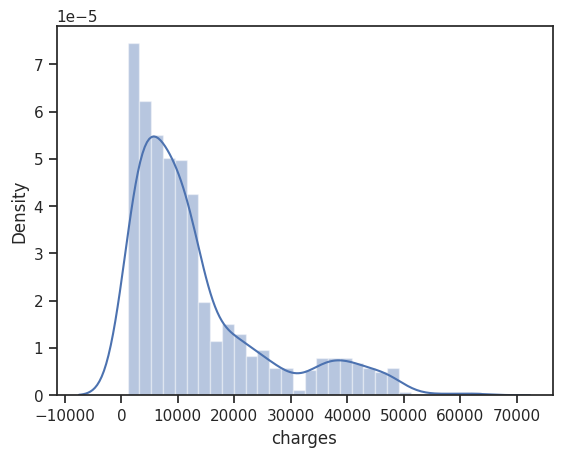

In [11]:
fig,axes=plt.subplots(1,1)
sns.distplot(df["charges"]);

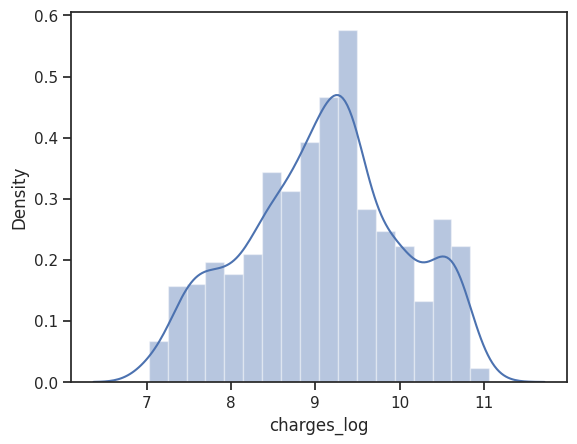

In [12]:
df["charges_log"] = np.log1p(df["charges"])
sns.distplot(df["charges_log"]);

In [13]:
label_encoder = LabelEncoder()

df['sex_encoded'] = label_encoder.fit_transform(df['sex'])

In [14]:
df

,age,sex,bmi,children,smoker,region,charges,charges_log,sex_encoded
0,19,female,27.900,0,yes,southwest,16884.92400,9.734236,0
1,18,male,33.770,1,no,southeast,1725.55230,7.453882,1
2,28,male,33.000,3,no,southeast,4449.46200,8.400763,1
3,33,male,22.705,0,no,northwest,21984.47061,9.998137,1
4,32,male,28.880,0,no,northwest,3866.85520,8.260455,1
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,9.268755,1
1334,18,female,31.920,0,no,northeast,2205.98080,7.699381,0
1335,18,female,36.850,0,no,southeast,1629.83350,7.396847,0
1336,21,female,25.800,0,no,southwest,2007.94500,7.605365,0
